In [9]:
import deeplabcut

config_path = deeplabcut.create_new_project(
    'FESFatigue', 
    'Jake', 
    ['/home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4'], 
    working_directory='/home/jakejoseph/Desktop/Joseph_Code/', 
    copy_videos=True, 
    multianimal=False
)


Project "/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-06-03" already exists!


In [1]:
import deeplabcut
config_path = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/config.yaml'
# deeplabcut.add_new_videos(config_path, ['/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/ECRB_interleaved_stim_5_30_1.mp4','/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4'])
# deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=True)

2024-06-07 12:19:13.496485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 12:19:13.757908: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 12:19:13.808516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2024-06-07 12:19:13.808548: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ign

Loading DLC 2.3.9...


/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
deeplabcut.label_frames(config_path)

Traceback (most recent call last):
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/vispy/app/backends/_qt.py", line 553, in wheelEvent
    self._vispy_canvas.events.mouse_wheel(
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/napari/_vispy/canvas.py", line 97, in _process_mouse_event
    super()._process_mouse_event(event)
  File "/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/vispy/scene/canvas.py", line 354, in _process_m

In [10]:
deeplabcut.create_training_dataset(config_path, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 9,  7, 18, 19, 12, 14,  4,  8, 13, 11,  1,  3,  6, 10, 17,  0, 15,
           5, 16]),
   array([2])))]

In [3]:
deeplabcut.train_network(config_path, shuffle=1, displayiters=100, saveiters=1000)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FESFatigueMay31/FESFatigue_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,


Selecting single-animal trainer
Batch Size is 1


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-05-31 13:13:25.295182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-31 13:13:25.295349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-05-31 13:13:25.295388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

Loading ImageNet-pretrained resnet_50


2024-05-31 13:13:25.963131: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-0/FESFatigueMay31-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4]], 'all_joints_names': ['DI

iteration: 100 loss: 0.0569 lr: 0.005
iteration: 200 loss: 0.0183 lr: 0.005
iteration: 300 loss: 0.0163 lr: 0.005
iteration: 400 loss: 0.0156 lr: 0.005
iteration: 500 loss: 0.0149 lr: 0.005
iteration: 600 loss: 0.0150 lr: 0.005
iteration: 700 loss: 0.0135 lr: 0.005
iteration: 800 loss: 0.0131 lr: 0.005
iteration: 900 loss: 0.0130 lr: 0.005
iteration: 1000 loss: 0.0119 lr: 0.005
iteration: 1100 loss: 0.0118 lr: 0.005
iteration: 1200 loss: 0.0108 lr: 0.005
iteration: 1300 loss: 0.0104 lr: 0.005
iteration: 1400 loss: 0.0106 lr: 0.005
iteration: 1500 loss: 0.0096 lr: 0.005
iteration: 1600 loss: 0.0104 lr: 0.005
iteration: 1700 loss: 0.0093 lr: 0.005
iteration: 1800 loss: 0.0091 lr: 0.005
iteration: 1900 loss: 0.0091 lr: 0.005
iteration: 2000 loss: 0.0091 lr: 0.005


KeyboardInterrupt: 

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FESNewCameraApr19/FESNewCamera_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': True,
 'snapsho

Running  DLC_resnet50_FESNewCameraApr19shuffle1_50000  with # of training iterations: 50000
Running evaluation ...


20it [00:19,  1.03it/s]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:930: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(resultsfilename, "df_with_missing")


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.36 pixels. Test error: 28.35  pixels.
With pcutoff of 0.6  train error: 2.36 pixels. Test error: 33.95 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


  0%|          | 0/20 [00:00<?, ?it/s]/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DataCombined[loopscorer][bp]["y"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + DataCombined[loopscorer][bp]["x"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


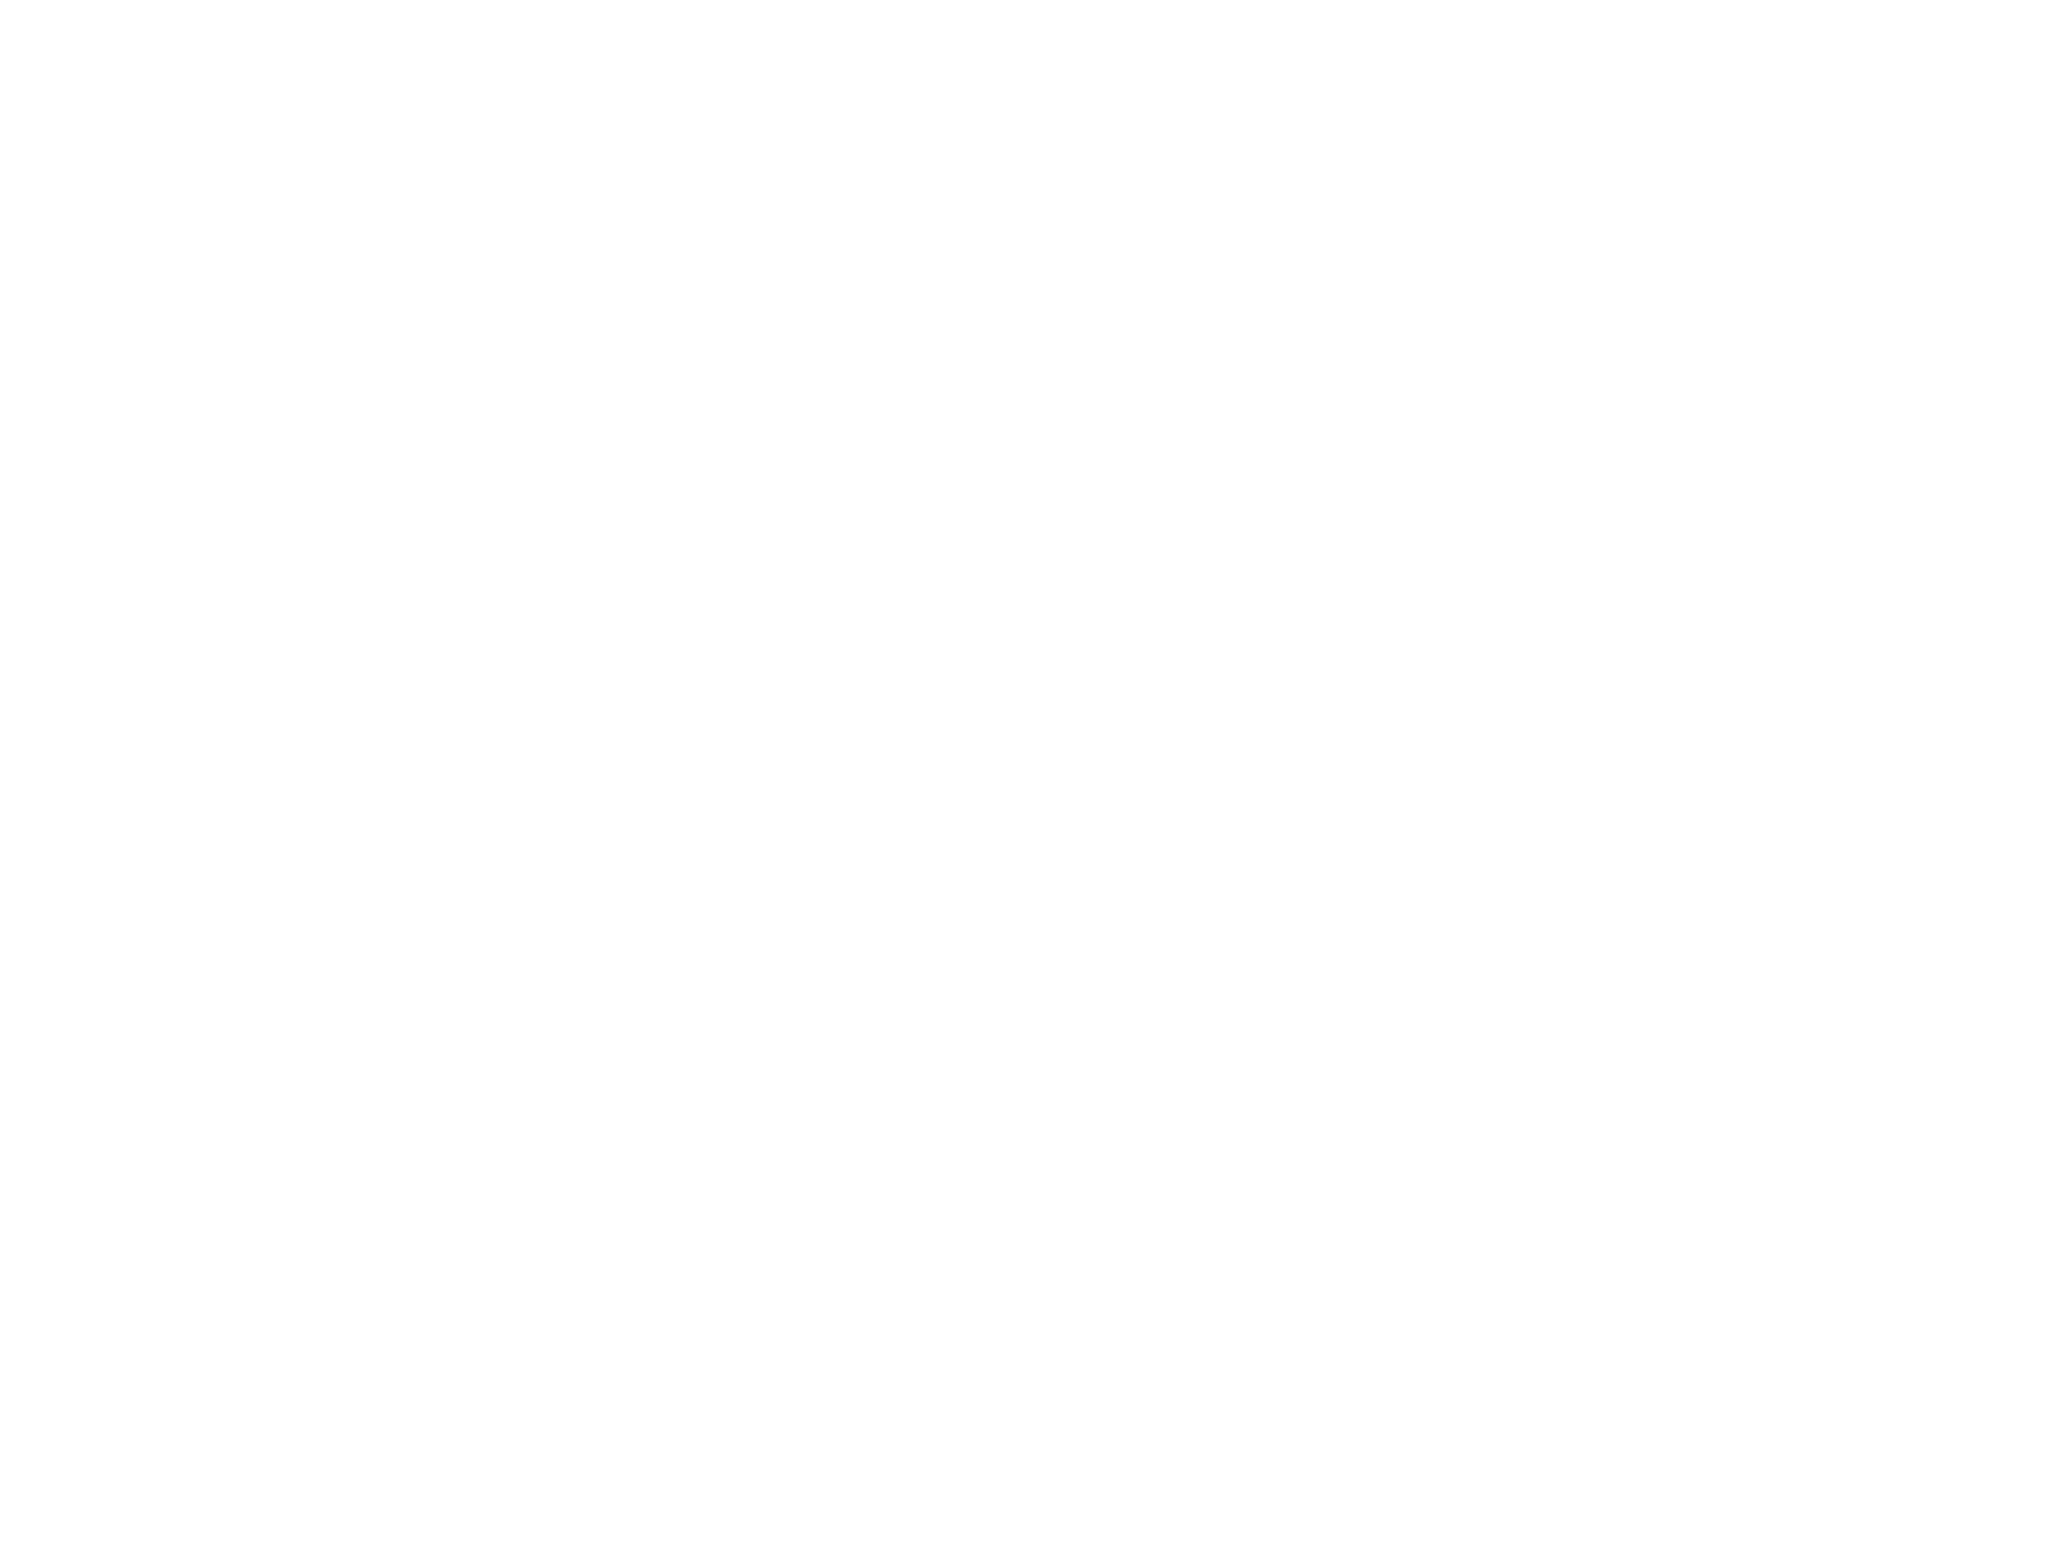

In [4]:
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=True)

In [11]:
video = '/home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4'
config_path = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/config.yaml'
deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
# deeplabcut.extract_outlier_frames(config_path, video,outlieralgorithm='uncertain',p_bound=0.05)

Using snapshot-2000 for model /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-0/FESFatigueMay31-trainset95shuffle1


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-06-03 10:17:06.392409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-03 10:17:06.392612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-06-03 10:17:06.392653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

Starting to analyze %  /home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4
Loading  /home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4
Duration of video [s]:  2355.87 , recorded with  30.0 fps!
Overall # of frames:  70676  found with (before cropping) frame dimensions:  2048 1536
Starting to extract posture


  3%|▎         | 2024/70676 [31:23<21:18:04,  1.12s/it]

In [8]:
video = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31'
deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
# deeplabcut.create_labeled_video(config_path, video, videotype = 'mp4', save_frames=False)

FileNotFoundError: It seems the model for iteration 0 and shuffle 1 and trainFraction 0.95 does not exist.

In [4]:
new_video = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/fatiguetest0523ecrb12_2.mp4'
# deeplabcut.extract_outlier_frames(config_path, new_video)
deeplabcut.refine_labels(config_path)

In [17]:
# deeplabcut.merge_datasets(config_path)
deeplabcut.create_training_dataset(config_path, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([29, 21,  4, 31, 25,  7, 32, 18, 30, 27, 20,  2, 19,  0, 14,  8, 26,
          11,  1,  3, 10, 16, 34,  6, 22, 37, 12, 33, 17,  9, 23, 13, 15,  5,
          36, 28]),
   array([35, 24])))]